# 1 to 1 process

In [1]:
from smpl import io

In [2]:
from pyfeyn2.interface.qgraf import style
import itertools as it
import re

In [3]:
from pyqgraf import qgraf, model
qgraf.install("3.6.5")
xml_string = qgraf.run("nu_e[p1]", "nu_e[p1]",loops=3,loop_momentum="l",model = model.gws_UnitaryGauge_reduced, style=style)

/home/apn/data/de.neuwirthinformatik.Alexander/Development/git/pyqgraf/pyqgraf/qgraf.py:87: UserWarning: 
	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	
  warnings.warn(




--------------------------------------------------------------------------------
-- Trying "Ninja" generator
--------------------------------
---------------------------
----------------------
-----------------
------------
-------
--
Not searching for unused variables given on the command line.
-- The C compiler identification is GNU 11.3.1
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- The CXX compiler identification is GNU 11.3.1
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /tmp/tmp7gc7tmtq/_cmake_test_compile/build
--
-------
------------
-----------------
----------------------
------------

CMake Warning:
  Manually-specified variables were not used by the project:

    PYTHON_EXECUTABLE
    PYTHON_INCLUDE_DIR
    PYTHON_LIBRARY
    PYTHON_VERSION_STRING
    Python3_EXECUTABLE
    Python3_FIND_REGISTRY
    Python3_INCLUDE_DIR
    Python3_NumPy_INCLUDE_DIRS
    Python3_ROOT_DIR
    Python_EXECUTABLE
    Python_FIND_REGISTRY
    Python_INCLUDE_DIR
    Python_NumPy_INCLUDE_DIRS
    Python_ROOT_DIR
    SKBUILD




[3/5] Building Fortran object CMakeFiles/qgraf.dir/qgraf-3.6.5.f08.o
[4/5] Linking Fortran executable qgraf
[4/5] Install the project...
-- Install configuration: ""
-- Installing: /tmp/tmp7gc7tmtq/bin/qgraf
/home/apn/.local/bin/qgraf-3.6.5 qgraf.dat

 --------------------------------------------------------------
                          qgraf-3.6.5
 --------------------------------------------------------------

  output= 'output.out' ;
  style= 'tmp.sty' ;
  model = 'tmp.model';
  in= nu_e[p1];
  out= nu_e[p1];
  loops= 3;
  loop_momentum= l;
  options= notadpole,onshell;

 --------------------------------------------------------------

   #loops    v-degrees          #diagrams

      3
              -   4^3     ....     0
             3^2  4^2     ....     3
             3^4  4^1     ....     36
             3^6   -      ....     365


        total =  404 connected diagrams



single photon diags 99


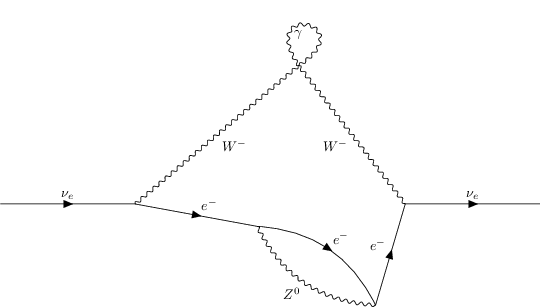

KeyboardInterrupt: 

In [4]:
from xsdata.formats.dataclass.parsers import XmlParser
from pyfeyn2.render.latex.feynmp import FeynmpRender
from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.feynmandiagram import FeynML

from pyfeyn2.auto.bend import auto_bend
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import feynman_adjust_points

parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)

def filter_diag(d):
    count = 0
    ecount = 0
    for p in d.propagators:
        if p.pdgid == 22:
            count +=1
        if p.pdgid == 11:
            ecount +=1
    if count ==1 and ecount >=2:
        return True
    return False

ccount=0 
for d in fml.diagrams:
    if filter_diag(d):
        ccount +=1
print("single photon diags", ccount)

for d in fml.diagrams:
    if filter_diag(d):
        ccount +=1
        d.legs[0].with_xy(-2,0)
        d.legs[1].with_xy(2,0)
        d.get_vertex(d.legs[0].target).with_xy(-1,0)
        d.get_vertex(d.legs[1].target).with_xy(1,0)
        d = feynman_adjust_points(d,size=15,override_vertices=False)
        auto_bend(d)
        auto_label(d.propagators)
        auto_label(d.legs)
        #print(d)
        t = TikzFeynmanRender(d)
        #print(t.get_src())
        t.render(show=True)
        #break

In [ ]:
print(xml_string)